# Drug consumption (quantified) Data Set

Abstract: Classify the type of drug consumer by personality data

Number of Instances: 1885

Number of Attributes: 32

Date Donated: 2016-10-17

Original database: http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Predict if a person is a drug consumer based on their personality data and demographics

In [2]:
# Required libraries
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from pylab import *

# ML
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import export_graphviz
import graphviz

# NN
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.


In [3]:
# Read data from csv saved in your computer
df = pd.read_csv("C:/Users/kqtt651/OneDrive - AZCollaboration/dataFrames/drugConsumption.csv", delimiter=';', decimal=",")
df.head() # visualize the first rows of tha DataFrame

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy.2,Heroin.2,Ketamine.2,Legalh.2,LSD.2,Meth.2,Mushrooms.2,Nicotine.2,Semer.2,VSA.2
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,NU,NU,NU,NU,NU,NU,NU,U,NU,NU
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,U,NU,U,NU,U,U,NU,U,NU,NU
2,3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,NU,NU,NU,NU,NU,NU,U,NU,NU,NU
3,4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,NU,NU,U,NU,NU,NU,NU,U,NU,NU
4,5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,U,NU,NU,U,NU,NU,U,U,NU,NU


### Exploratory analysis and data visualization

18-24    637
25-34    480
35-44    355
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64


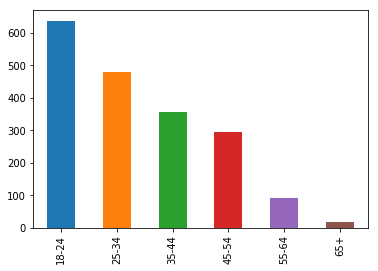

In [17]:
age_counts = df['Age'].value_counts()
print(age_counts)
age_counts.plot(kind='bar');

Male      940
Female    937
Name: Gender, dtype: int64


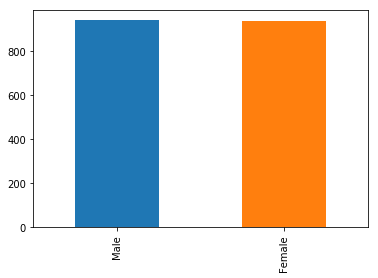

In [18]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)
gender_counts.plot(kind='bar');

Some college or university, no certificate or degree    503
University degree                                       478
Masters degree                                          283
Professional certificate/ diploma                       270
Left school at 18 years                                  99
Left school at 16 years                                  98
Doctorate degree                                         89
Left school at 17 years                                  29
Left school before 16 years                              28
Name: Education, dtype: int64


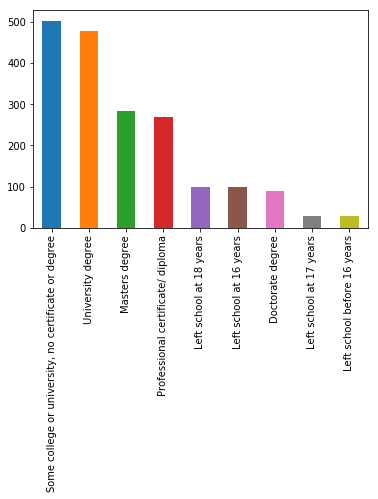

In [19]:
education_counts = df['Education'].value_counts()
print(education_counts)
education_counts.plot(kind='bar');

UK                     1044
USA                     551
Other                   118
Canada                   87
Australia                52
Republic of Ireland      20
New Zealand               5
Name: Country, dtype: int64


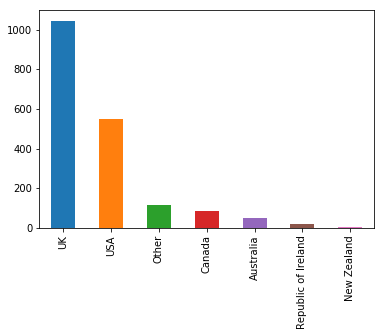

In [16]:
country_counts = df['Country'].value_counts()
print(country_counts)
country_counts.plot(kind='bar');

In [99]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Age'], prefix = ['Age'])
df_onehot = pd.get_dummies(df_onehot, columns=['Gender'], prefix = ['Gender'])
df_onehot = pd.get_dummies(df_onehot, columns=['Education'], prefix = ['Education'])
df_onehot = pd.get_dummies(df_onehot, columns=['Country'], prefix = ['Country'])
df_onehot = pd.get_dummies(df_onehot, columns=['Ethnicity'], prefix = ['Ethnicity'])

#df_onehot.head()
#df_onehot[df_onehot.columns[0:5]]


The first columns correspond to the demographic information. They are cathegorical variables, we will have transform them in order to use them in the analysis as Python can not handle cathegorical data directly (R has this option).
To do this we will transform each entry into different levels:

In [20]:
label_encoder = preprocessing.LabelEncoder()

df['Age'] = label_encoder.fit_transform(df['Age'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])
df.head()
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state=10)


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy.2,Heroin.2,Ketamine.2,Legalh.2,LSD.2,Meth.2,Mushrooms.2,Nicotine.2,Semer.2,VSA.2
0,1,2,0,6,5,3,0.31287,-0.57545,-0.58331,-0.91699,...,NU,NU,NU,NU,NU,NU,NU,U,NU,NU
1,2,1,1,0,5,6,-0.67825,1.93886,1.43533,0.76096,...,U,NU,U,NU,U,U,NU,U,NU,NU
2,3,2,1,6,5,6,-0.46725,0.80523,-0.84732,-1.62090,...,NU,NU,NU,NU,NU,NU,U,NU,NU,NU
3,4,0,0,5,5,6,-0.14882,-0.80615,-0.01928,0.59042,...,NU,NU,U,NU,NU,NU,NU,U,NU,NU
4,5,2,0,0,5,6,0.73545,-1.63340,-0.45174,-0.30172,...,U,NU,NU,U,NU,NU,U,U,NU,NU


In [68]:
X = df[df.columns[1:13]]
X = stats.zscore(np.array(X, dtype = np.float))

Y_names = ['Coke.1', 'Crack.1','Ecstasy.1', 'Heroin.1']
Y_names
Y = df[['Coke.1', 'Crack.1','Ecstasy.1', 'Heroin.1', ]].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state=10)

In [69]:
#df[df.columns[1:5]]
#X = df[['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].apply(lambda x: x.str.replace(',','.'))
#X = pd.concat([df2, df], axis=1, sort=False)
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state=10)
X1 = df[df.columns[6:13]]
X1 = stats.zscore(np.array(X1, dtype = np.float))
X2 = df[df.columns[1:6]]
X2 = np.array(X2, dtype = np.float)
X2
X = np.concatenate((X2,X1),axis=1)

### PCA

[[ 3.12514160e-01 -2.50852578e-01 -1.50853816e-01 -3.38724693e-02
  -3.38067389e-02 -2.48604178e-01  5.99364507e-02 -2.74451272e-01
   2.62597281e-01  3.94182098e-01 -4.77208213e-01 -4.70718936e-01]
 [-1.14282149e-01  6.78695880e-03  7.46694707e-02  9.88949920e-03
   2.58265742e-02 -4.67041722e-01  5.89728476e-01  3.78859188e-01
   2.40241826e-01  3.42586046e-01  1.34966600e-01  2.78951495e-01]
 [-2.62039667e-01 -3.43318373e-01  3.60184015e-01  4.42457525e-01
  -6.07812816e-01  2.13983316e-01 -1.04254526e-02  9.57543560e-02
   2.32853050e-01  2.48364309e-04 -5.52403196e-02 -7.86864522e-02]
 [ 9.77922761e-02  3.67374451e-01 -1.45895654e-01 -2.23935102e-01
  -7.53141259e-01 -2.47887701e-01  6.65692586e-02 -1.71346344e-01
  -3.40097042e-01  5.19104623e-02  4.75521624e-02  3.09387232e-02]
 [ 1.70929704e-01 -5.54939438e-01 -4.02695267e-01 -4.54766662e-01
  -1.94427557e-01  2.98440920e-01  1.65890347e-01  7.42824579e-02
   1.64976868e-01 -1.03948166e-01  2.85007560e-01  1.21204848e-01]
 [-3.

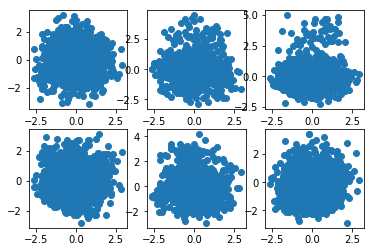

In [70]:
pca = PCA(n_components = 7, whiten = True).fit(X_train)
X_pca = pca.transform(X_train)
print(pca.components_)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
p = 0
plt.subplot(2,3,1)
plt.scatter(X_pca[:, p], X_pca[:, 1])
plt.subplot(2,3,2)
plt.scatter(X_pca[:, p], X_pca[:, 2])
plt.subplot(2,3,3)
plt.scatter(X_pca[:, p], X_pca[:, 3])
plt.subplot(2,3,4)
plt.scatter(X_pca[:, p], X_pca[:, 4])
plt.subplot(2,3,5)
plt.scatter(X_pca[:, p], X_pca[:, 5])
plt.subplot(2,3,6)
plt.scatter(X_pca[:, p], X_pca[:, 6])


### KMeans

Text(0.5,0,'Escore')

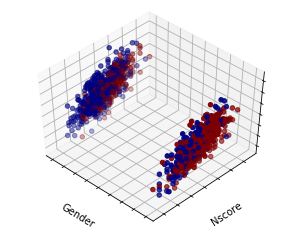

In [119]:
model_KMeans = KMeans(n_clusters = 2)

fig = plt.figure(figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
model_KMeans.fit(X_train)
labels = model_KMeans.labels_

#6 #7
ax.scatter(X_train[:,1], X_train[:,5], X_train[:,6], c=labels.astype(np.float), cmap='jet')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Gender')
ax.set_ylabel('Nscore')
ax.set_zlabel('Escore')

#plt.scatter(X_train[:,0],X_train[:,1], c=labels.astype(np.float))

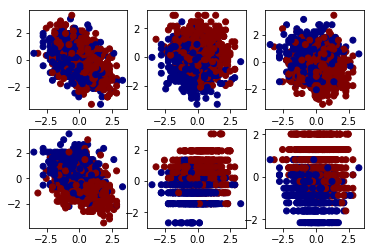

In [117]:
plt.subplot(2,3,1)
plt.scatter(X_train[:, 5], X_train[:, 6], c=labels.astype(np.float), cmap='jet');
plt.subplot(2,3,2)
plt.scatter(X_train[:, 5], X_train[:, 7], c=labels.astype(np.float), cmap='jet');
plt.subplot(2,3,3)
plt.scatter(X_train[:, 5], X_train[:, 8], c=labels.astype(np.float), cmap='jet');
plt.subplot(2,3,4)
plt.scatter(X_train[:, 5], X_train[:, 9], c=labels.astype(np.float), cmap='jet');
plt.subplot(2,3,5)
plt.scatter(X_train[:, 5], X_train[:, 10], c=labels.astype(np.float), cmap='jet');
plt.subplot(2,3,6)
plt.scatter(X_train[:, 5], X_train[:, 11], c=labels.astype(np.float), cmap='jet');

### Decission Tree

In [25]:
model_Tree = tree.DecisionTreeClassifier()
model_Tree_fit = model_Tree.fit(X_train, Y_train)
#tree.plot_tree(model_Tree_fit)
prediction_Tree = model_Tree_fit.predict(X_test)

# Print prediction accuracy
accuracy_Tree = sum((np.equal(prediction_Tree, Y_test)), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_Tree[0]*100,2), "%")
print("Percentage correctly classified:",round(accuracy_Tree[1]*100,2), "%")
print("Percentage correctly classified:",round(accuracy_Tree[2]*100,2), "%")
print("Percentage correctly classified:",round(accuracy_Tree[3]*100,2), "%")


Percentage correctly classified: 60.48 %
Percentage correctly classified: 80.65 %
Percentage correctly classified: 63.23 %
Percentage correctly classified: 79.03 %


In [26]:
model_GNB = GaussianNB()
model_GNB_fit = model_GNB.fit(X_train, Y_train[:,0])
prediction_GNB = model_GNB_fit.predict(X_test)

# Print prediction accuracy
accuracy_GNB = sum((np.equal(prediction_GNB, Y_test[:,0])), axis= 0)/Y_test.shape[0]

print("Percentage correctly classified:",round(accuracy_GNB*100,2), "%")

model_GNB_fit = model_GNB.fit(X_train, Y_train[:,1])
prediction_GNB = model_GNB_fit.predict(X_test)
accuracy_GNB = sum((np.equal(prediction_GNB, Y_test[:,1])), axis= 0)/Y_test.shape[0]

print("Percentage correctly classified:",round(accuracy_GNB*100,2), "%")

model_GNB_fit = model_GNB.fit(X_train, Y_train[:,2])
prediction_GNB = model_GNB_fit.predict(X_test)
accuracy_GNB = sum((np.equal(prediction_GNB, Y_test[:,2])), axis= 0)/Y_test.shape[0]

print("Percentage correctly classified:",round(accuracy_GNB*100,2), "%")

model_GNB_fit = model_GNB.fit(X_train, Y_train[:,3])
prediction_GNB = model_GNB_fit.predict(X_test)
accuracy_GNB = sum((np.equal(prediction_GNB, Y_test[:,3])), axis= 0)/Y_test.shape[0]

print("Percentage correctly classified:",round(accuracy_GNB*100,2), "%")

Percentage correctly classified: 65.65 %
Percentage correctly classified: 81.77 %
Percentage correctly classified: 75.0 %
Percentage correctly classified: 80.65 %


In [27]:
model_SVM = svm.SVC(kernel = 'linear')

# Print prediction accuracy
model_SVM_fit = model_SVM.fit(X_train, Y_train[:,0])
prediction_SVM = model_SVM_fit.predict(X_test)
accuracy_SVM = sum((np.equal(prediction_SVM, Y_test[:,0])), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_SVM*100,2), "%")

# Print prediction accuracy
model_SVM_fit = model_SVM.fit(X_train, Y_train[:,1])
prediction_SVM = model_SVM_fit.predict(X_test)
accuracy_SVM = sum((np.equal(prediction_SVM, Y_test[:,1])), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_SVM*100,2), "%")

# Print prediction accuracy
model_SVM_fit = model_SVM.fit(X_train, Y_train[:,2])
prediction_SVM = model_SVM_fit.predict(X_test)
accuracy_SVM = sum((np.equal(prediction_SVM, Y_test[:,2])), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_SVM*100,2), "%")

# Print prediction accuracy
model_SVM_fit = model_SVM.fit(X_train, Y_train[:,3])
prediction_SVM = model_SVM_fit.predict(X_test)
accuracy_SVM = sum((np.equal(prediction_SVM, Y_test[:,3])), axis= 0)/Y_test.shape[0]
print("Percentage correctly classified:",round(accuracy_SVM*100,2), "%")

Percentage correctly classified: 63.23 %
Percentage correctly classified: 86.29 %
Percentage correctly classified: 73.55 %
Percentage correctly classified: 84.84 %


### Neural Network
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [28]:
# Build the model
model = keras.Sequential([
        keras.layers.Dense(10, input_dim = 12, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(5, input_dim = 12, activation = 'relu'),
        keras.layers.Dense(5, activation = 'relu'),
        keras.layers.Dense(3, input_dim = 12, activation = 'relu'),
        keras.layers.Dense(3, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
        ])


Instructions for updating:
Colocations handled automatically by placer.


In [29]:
# Compile the model
model.compile(loss='binary_crossentropy', # for binary classification use logarithmic loss, defined as binary_crossentropy
              optimizer = 'adam', # gradient descent algorithm
              metrics=['accuracy'])

In [30]:
# Train the model
model.fit(X_train, Y_train[:,1], epochs = 1000, batch_size = 10)



Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
1257/1257 [==============================] - 1s 827us/sample - loss: 0.5578 - acc: 0.8648
Epoch 2/1000
1257/1257 [==============================] - 0s 341us/sample - loss: 0.4066 - acc: 0.8648
Epoch 3/1000
1257/1257 [==============================] - 0s 289us/sample - loss: 0.3849 - acc: 0.8648
Epoch 4/1000
1257/1257 [==============================] - 0s 304us/sample - loss: 0.3763 - acc: 0.8648
Epoch 5/1000
1257/1257 [==============================] - 0s 310us/sample - loss: 0.3700 - acc: 0.8648
Epoch 6/1000
1257/1257 [==============================] - 0s 278us/sample - loss: 0.3658 - acc: 0.8648
Epoch 7/1000
1257/1257 [==============================] - 0s 305us/sample - loss: 0.3623 - acc: 0.8648
Epoch 8/1000
1257/1257 [==============================] - 0s 304us/sample - loss: 0.3587 - acc: 0.8648
Epoch 9/1000
1257/1257 [==============================] - 0s 264us/sample - loss: 0.3564 - acc: 0.8648
Epoch 10/1000
1257/1257 [

1257/1257 [==============================] - 0s 217us/sample - loss: 0.2637 - acc: 0.8775
Epoch 78/1000
1257/1257 [==============================] - 0s 305us/sample - loss: 0.2607 - acc: 0.8791
Epoch 79/1000
1257/1257 [==============================] - 0s 288us/sample - loss: 0.2584 - acc: 0.8807
Epoch 80/1000
1257/1257 [==============================] - 0s 206us/sample - loss: 0.2573 - acc: 0.8783
Epoch 81/1000
1257/1257 [==============================] - 0s 227us/sample - loss: 0.2573 - acc: 0.8783
Epoch 82/1000
1257/1257 [==============================] - 0s 201us/sample - loss: 0.2532 - acc: 0.8831
Epoch 83/1000
1257/1257 [==============================] - 0s 189us/sample - loss: 0.2531 - acc: 0.8839
Epoch 84/1000
1257/1257 [==============================] - 0s 191us/sample - loss: 0.2533 - acc: 0.8823
Epoch 85/1000
1257/1257 [==============================] - 0s 219us/sample - loss: 0.2514 - acc: 0.8823
Epoch 86/1000
1257/1257 [==============================] - 0s 255us/sample - l

1257/1257 [==============================] - 0s 255us/sample - loss: 0.2177 - acc: 0.8950
Epoch 156/1000
1257/1257 [==============================] - 0s 268us/sample - loss: 0.2184 - acc: 0.8958
Epoch 157/1000
1257/1257 [==============================] - 0s 233us/sample - loss: 0.2164 - acc: 0.8990
Epoch 158/1000
1257/1257 [==============================] - 0s 283us/sample - loss: 0.2127 - acc: 0.8982
Epoch 159/1000
1257/1257 [==============================] - 0s 279us/sample - loss: 0.2105 - acc: 0.9021
Epoch 160/1000
1257/1257 [==============================] - 0s 235us/sample - loss: 0.2090 - acc: 0.9014
Epoch 161/1000
1257/1257 [==============================] - 0s 272us/sample - loss: 0.2134 - acc: 0.9037
Epoch 162/1000
1257/1257 [==============================] - 0s 266us/sample - loss: 0.2149 - acc: 0.8990
Epoch 163/1000
1257/1257 [==============================] - 0s 249us/sample - loss: 0.2157 - acc: 0.9006
Epoch 164/1000
1257/1257 [==============================] - 0s 288us/s

1257/1257 [==============================] - 0s 224us/sample - loss: 0.1882 - acc: 0.9109
Epoch 233/1000
1257/1257 [==============================] - 0s 242us/sample - loss: 0.1853 - acc: 0.9165
Epoch 234/1000
1257/1257 [==============================] - 0s 276us/sample - loss: 0.1902 - acc: 0.9077
Epoch 235/1000
1257/1257 [==============================] - 0s 328us/sample - loss: 0.1838 - acc: 0.9157
Epoch 236/1000
1257/1257 [==============================] - 0s 280us/sample - loss: 0.1835 - acc: 0.9093
Epoch 237/1000
1257/1257 [==============================] - 0s 246us/sample - loss: 0.1863 - acc: 0.9133
Epoch 238/1000
1257/1257 [==============================] - 0s 312us/sample - loss: 0.1830 - acc: 0.9109
Epoch 239/1000
1257/1257 [==============================] - 0s 268us/sample - loss: 0.1849 - acc: 0.9157
Epoch 240/1000
1257/1257 [==============================] - 0s 259us/sample - loss: 0.1750 - acc: 0.9204
Epoch 241/1000
1257/1257 [==============================] - 0s 307us/s

1257/1257 [==============================] - 0s 264us/sample - loss: 0.1597 - acc: 0.9189
Epoch 311/1000
1257/1257 [==============================] - 0s 305us/sample - loss: 0.1606 - acc: 0.9212
Epoch 312/1000
1257/1257 [==============================] - 0s 274us/sample - loss: 0.1544 - acc: 0.9236
Epoch 313/1000
1257/1257 [==============================] - 0s 302us/sample - loss: 0.1816 - acc: 0.9093
Epoch 314/1000
1257/1257 [==============================] - 0s 294us/sample - loss: 0.1848 - acc: 0.9093
Epoch 315/1000
1257/1257 [==============================] - 0s 299us/sample - loss: 0.1923 - acc: 0.9014
Epoch 316/1000
1257/1257 [==============================] - 0s 301us/sample - loss: 0.1858 - acc: 0.9045
Epoch 317/1000
1257/1257 [==============================] - 0s 318us/sample - loss: 0.1657 - acc: 0.9165
Epoch 318/1000
1257/1257 [==============================] - 0s 290us/sample - loss: 0.1643 - acc: 0.9165
Epoch 319/1000
1257/1257 [==============================] - 0s 302us/s

Epoch 388/1000
1257/1257 [==============================] - 0s 245us/sample - loss: 0.1489 - acc: 0.9300
Epoch 389/1000
1257/1257 [==============================] - 0s 314us/sample - loss: 0.1604 - acc: 0.9196
Epoch 390/1000
1257/1257 [==============================] - 0s 301us/sample - loss: 0.1546 - acc: 0.9189
Epoch 391/1000
1257/1257 [==============================] - 0s 307us/sample - loss: 0.1974 - acc: 0.9006
Epoch 392/1000
1257/1257 [==============================] - 0s 315us/sample - loss: 0.1582 - acc: 0.9157
Epoch 393/1000
1257/1257 [==============================] - 0s 305us/sample - loss: 0.1618 - acc: 0.9173
Epoch 394/1000
1257/1257 [==============================] - 0s 310us/sample - loss: 0.1554 - acc: 0.9220
Epoch 395/1000
1257/1257 [==============================] - 0s 291us/sample - loss: 0.1710 - acc: 0.9165
Epoch 396/1000
1257/1257 [==============================] - 0s 293us/sample - loss: 0.1536 - acc: 0.9157
Epoch 397/1000
1257/1257 [=============================

1257/1257 [==============================] - 0s 224us/sample - loss: 0.1670 - acc: 0.9173
Epoch 467/1000
1257/1257 [==============================] - 0s 292us/sample - loss: 0.1418 - acc: 0.9284
Epoch 468/1000
1257/1257 [==============================] - 0s 303us/sample - loss: 0.1436 - acc: 0.9212
Epoch 469/1000
1257/1257 [==============================] - 0s 315us/sample - loss: 0.1783 - acc: 0.9117
Epoch 470/1000
1257/1257 [==============================] - 0s 305us/sample - loss: 0.1614 - acc: 0.9189
Epoch 471/1000
1257/1257 [==============================] - 0s 315us/sample - loss: 0.1435 - acc: 0.9292
Epoch 472/1000
1257/1257 [==============================] - 0s 294us/sample - loss: 0.1371 - acc: 0.9268
Epoch 473/1000
1257/1257 [==============================] - 0s 312us/sample - loss: 0.1344 - acc: 0.9324
Epoch 474/1000
1257/1257 [==============================] - 0s 276us/sample - loss: 0.1284 - acc: 0.9379
Epoch 475/1000
1257/1257 [==============================] - 0s 279us/s

1257/1257 [==============================] - 0s 197us/sample - loss: 0.1259 - acc: 0.9316
Epoch 545/1000
1257/1257 [==============================] - 0s 214us/sample - loss: 0.1295 - acc: 0.9332
Epoch 546/1000
1257/1257 [==============================] - 0s 192us/sample - loss: 0.1233 - acc: 0.9340
Epoch 547/1000
1257/1257 [==============================] - 0s 220us/sample - loss: 0.1248 - acc: 0.9356
Epoch 548/1000
1257/1257 [==============================] - 0s 246us/sample - loss: 0.1187 - acc: 0.9411
Epoch 549/1000
1257/1257 [==============================] - 0s 212us/sample - loss: 0.1201 - acc: 0.9340
Epoch 550/1000
1257/1257 [==============================] - 0s 231us/sample - loss: 0.1241 - acc: 0.9356
Epoch 551/1000
1257/1257 [==============================] - 0s 246us/sample - loss: 0.1244 - acc: 0.9364
Epoch 552/1000
1257/1257 [==============================] - 0s 225us/sample - loss: 0.1347 - acc: 0.9300
Epoch 553/1000
1257/1257 [==============================] - 0s 240us/s

1257/1257 [==============================] - 0s 233us/sample - loss: 0.1667 - acc: 0.9085
Epoch 623/1000
1257/1257 [==============================] - 0s 314us/sample - loss: 0.1664 - acc: 0.9141
Epoch 624/1000
1257/1257 [==============================] - 0s 305us/sample - loss: 0.1504 - acc: 0.9181
Epoch 625/1000
1257/1257 [==============================] - 0s 325us/sample - loss: 0.1449 - acc: 0.9228
Epoch 626/1000
1257/1257 [==============================] - 0s 319us/sample - loss: 0.1323 - acc: 0.9284
Epoch 627/1000
1257/1257 [==============================] - 0s 332us/sample - loss: 0.1335 - acc: 0.9276
Epoch 628/1000
1257/1257 [==============================] - 0s 288us/sample - loss: 0.1313 - acc: 0.9284
Epoch 629/1000
1257/1257 [==============================] - 0s 302us/sample - loss: 0.1233 - acc: 0.9340
Epoch 630/1000
1257/1257 [==============================] - 0s 244us/sample - loss: 0.1252 - acc: 0.9348
Epoch 631/1000
1257/1257 [==============================] - 0s 254us/s

Epoch 700/1000
1257/1257 [==============================] - 0s 269us/sample - loss: 0.1302 - acc: 0.9387
Epoch 701/1000
1257/1257 [==============================] - 0s 326us/sample - loss: 0.1248 - acc: 0.9379
Epoch 702/1000
1257/1257 [==============================] - 0s 293us/sample - loss: 0.1307 - acc: 0.9348
Epoch 703/1000
1257/1257 [==============================] - 0s 306us/sample - loss: 0.1285 - acc: 0.9340
Epoch 704/1000
1257/1257 [==============================] - 0s 286us/sample - loss: 0.1265 - acc: 0.9340
Epoch 705/1000
1257/1257 [==============================] - 0s 285us/sample - loss: 0.1270 - acc: 0.9340
Epoch 706/1000
1257/1257 [==============================] - 0s 286us/sample - loss: 0.1320 - acc: 0.9316
Epoch 707/1000
1257/1257 [==============================] - 0s 269us/sample - loss: 0.1387 - acc: 0.9308
Epoch 708/1000
1257/1257 [==============================] - 0s 288us/sample - loss: 0.1309 - acc: 0.9348
Epoch 709/1000
1257/1257 [=============================

1257/1257 [==============================] - 0s 234us/sample - loss: 0.1654 - acc: 0.9133
Epoch 778/1000
1257/1257 [==============================] - 0s 303us/sample - loss: 0.1588 - acc: 0.9189
Epoch 779/1000
1257/1257 [==============================] - 0s 292us/sample - loss: 0.1614 - acc: 0.9228
Epoch 780/1000
1257/1257 [==============================] - 0s 298us/sample - loss: 0.1535 - acc: 0.9220
Epoch 781/1000
1257/1257 [==============================] - 0s 274us/sample - loss: 0.1731 - acc: 0.9212
Epoch 782/1000
1257/1257 [==============================] - 0s 265us/sample - loss: 0.1508 - acc: 0.9228
Epoch 783/1000
1257/1257 [==============================] - 0s 254us/sample - loss: 0.1380 - acc: 0.9252
Epoch 784/1000
1257/1257 [==============================] - 0s 285us/sample - loss: 0.1253 - acc: 0.9364
Epoch 785/1000
1257/1257 [==============================] - 0s 296us/sample - loss: 0.1274 - acc: 0.9308
Epoch 786/1000
1257/1257 [==============================] - 0s 293us/s

1257/1257 [==============================] - 0s 293us/sample - loss: 0.1244 - acc: 0.9364
Epoch 856/1000
1257/1257 [==============================] - 0s 310us/sample - loss: 0.1276 - acc: 0.9348
Epoch 857/1000
1257/1257 [==============================] - 0s 313us/sample - loss: 0.1261 - acc: 0.9356
Epoch 858/1000
1257/1257 [==============================] - 0s 304us/sample - loss: 0.1174 - acc: 0.9443
Epoch 859/1000
1257/1257 [==============================] - 0s 302us/sample - loss: 0.1139 - acc: 0.9475
Epoch 860/1000
1257/1257 [==============================] - 0s 291us/sample - loss: 0.1110 - acc: 0.9499
Epoch 861/1000
1257/1257 [==============================] - 0s 313us/sample - loss: 0.1124 - acc: 0.9459
Epoch 862/1000
1257/1257 [==============================] - 0s 316us/sample - loss: 0.1079 - acc: 0.9491
Epoch 863/1000
1257/1257 [==============================] - 0s 319us/sample - loss: 0.1104 - acc: 0.9475
Epoch 864/1000
1257/1257 [==============================] - 0s 316us/s

1257/1257 [==============================] - 0s 265us/sample - loss: 0.1339 - acc: 0.9403
Epoch 934/1000
1257/1257 [==============================] - 0s 279us/sample - loss: 0.1144 - acc: 0.9467
Epoch 935/1000
1257/1257 [==============================] - 0s 265us/sample - loss: 0.1154 - acc: 0.9475
Epoch 936/1000
1257/1257 [==============================] - 0s 278us/sample - loss: 0.1102 - acc: 0.9483
Epoch 937/1000
1257/1257 [==============================] - 0s 287us/sample - loss: 0.1127 - acc: 0.9467
Epoch 938/1000
1257/1257 [==============================] - 0s 261us/sample - loss: 0.1064 - acc: 0.9523
Epoch 939/1000
1257/1257 [==============================] - 0s 303us/sample - loss: 0.1097 - acc: 0.9491
Epoch 940/1000
1257/1257 [==============================] - 0s 319us/sample - loss: 0.1189 - acc: 0.9459
Epoch 941/1000
1257/1257 [==============================] - 0s 302us/sample - loss: 0.1054 - acc: 0.9515
Epoch 942/1000
1257/1257 [==============================] - 0s 275us/s

In [35]:
# Evaluate accuracy
testLoss, testAcc = model.evaluate(X_test, Y_test[:,1])
print('Test accuracy:', testAcc)

620/620 [==============================] - 0s 37us/sample - loss: 1.6410 - acc: 0.7548
Test accuracy: 0.7548387


In [43]:
# Make predictions
predictions = model.predict(X_test)
#print(np.round(predictions))
#print(Y_test[:,1])
accuracy_NN = sum((np.equal(np.round(predictions), Y_test[:,1])), axis= 0)/Y_test.shape[0]
#print("Percentage correctly classified:",round(accuracy_NN*100,2), "%")
sum(np.round(accuracy_NN))/Y_test.shape[0]

0.8629032258064516